In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir("E:\data")

In [3]:
os.listdir()

['act_pred_train.xlsx',
 'bank.xlsx',
 'Banks_full.csv',
 'Bank_Account_Details.csv',
 'BANK_ACCOUNT_TRANSACTION.csv',
 'Bank_customer.csv',
 'Black friday_test.csv',
 'Black friday_train.csv',
 'car data.csv',
 'Car details v3.csv',
 'car_done.csv',
 'car_evaluation.csv',
 'corr.xlsx',
 'Country-Code.xlsx',
 'country_wise_latest.csv',
 'covid19_sample1.csv',
 'Customer.csv',
 'Customer.xlsx',
 'Cust_data.csv',
 'Cust_demo.csv',
 'cust_new.csv',
 'cust_seg.csv',
 'Data.csv',
 'data_time_series.csv',
 'decision-tree-classifier-tutorial.ipynb',
 'Default.csv',
 'diabetes.csv',
 'E-commerce data.xlsx',
 'Ecommerce.csv',
 'emp.xlsx',
 'exported data.csv',
 'Good study_projects',
 'GoogleReview.csv',
 'google_review_ratings.csv',
 'Groceries_dataset.csv',
 'homework.xlsx',
 'HR data.csv',
 'https.docx',
 'kc_house_data.csv',
 'Laptop.csv',
 'LoansData (1).csv',
 'LoansData.csv',
 'LogReg_Default.ipynb',
 'London_postal_codes.csv',
 'Mobile_data.csv',
 'Mytable.csv',
 'Mytable.xlsx',
 'Order

# problem Statement


A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [4]:
#importing train data
df_train=pd.read_csv('Black friday_train.csv')

In [5]:
#data observing by watching 
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# importing test data
df_test=pd.read_csv('Black friday_test.csv')

In [7]:
# data observing by watching 
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
# merging both data set into one by append methods
df=df_train.append(df_test)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_11336\1472743971.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


 We are going to take age as a categorical varible because it has range 

In [9]:
# data volumes (rows and columns)
df_train.shape

(550068, 12)

In [10]:
# After merging both data volumes of data increase like rows
df.shape

(783667, 12)

In [11]:
# Gathering all basic info abut dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [12]:
# basic stats portion
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
# Going to drop user id because it's inappropriate for this data
df.drop(["User_ID"],axis=1,inplace=True)

In [14]:
# Checking user_id is droped or not.
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
# Converting gender into numerical variable like female :0 & male:1
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [16]:
# Checking gender column converted or not .
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
# knowing how many age group does age variable carry.
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

We observed that their are 8 age group

In [18]:
# Going to give rank to every age group by this it will be easy to identify it.
# Also the variable is not in sorted sequence so, we are going to arrange into a sorted sequece
df["Age"]=df["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [19]:
#successfully given rank to age variable
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [20]:
##second technqiue to give rank to age variable 
# from sklearn import preprocessing
 
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
 
# # Encode labels in column 'species'.
# df['Age']= label_encoder.fit_transform(df['Age'])
 
# df['Age'].unique()

In [21]:
# WE have 3 cities which are in alphabatical way we convert them in numerical
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [22]:
# Now we are going to convert into numerical way
# Technique we are going to use is get.dummies
# Technique is similar to above map fun.
df_city=pd.get_dummies(df["City_Category"],drop_first=True)

In [23]:
# Going to merge new city variable into previous df dataset
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [24]:
# Now work will be done so, we are going to delete city category variable from dataset
df.drop("City_Category",axis=1,inplace=True)

In [25]:
# successfully deleted specific column
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [26]:
# Identify the missing value into dataset 
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

All Three product categories has missing value 

**Analysing missing values columns like :  Purchase, Product_catecogry_1,Product_category_2**

In [27]:
# checking the variable values 
# Not replace missing value in this because it's a part of test data 
df['Purchase'].value_counts()

7011.0     191
7193.0     188
6855.0     187
6891.0     184
7012.0     183
          ... 
23491.0      1
18345.0      1
3372.0       1
855.0        1
21489.0      1
Name: Purchase, Length: 18105, dtype: int64

In [28]:
# checking the variable unique values
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [29]:
# checking the variable unique values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
# checking the variable values
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [31]:
# checking the variable unique values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [32]:
# checking the variable values
df['Product_Category_1'].value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [33]:
df["Purchase"].isnull().sum()

233599

**Missing value Treatment**

In [34]:
# Try to find mode in the missing value variable.  
df['Product_Category_2'].mode()[0]

8.0

In [35]:
# Replacing mode value from missing value 
df["Product_Category_2"]=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [36]:
# checking all values successfully replaced or not.
df["Product_Category_2"].isnull().sum()

0

In [37]:
# Try to find mode in the missing value variable.  
df['Product_Category_3'].mode()[0]

16.0

In [38]:
# Replacing mode value from missing value 
df["Product_Category_3"]=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [39]:
# successfully replaced missing value 
df['Product_Category_3'].isnull().sum()

0

In [40]:
df.shape

(783667, 12)

In [41]:
# In this variable we some symbols in with value so, we have to replce them because they are not usefull to us.
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [42]:
# Going to replace all splecial symbol which are not use full
df["Stay_In_Current_City_Years"]=df['Stay_In_Current_City_Years'].str.replace('+'," ")

C:\Users\HP\AppData\Local\Temp\ipykernel_11336\1419633097.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"]=df['Stay_In_Current_City_Years'].str.replace('+'," ")


In [43]:
# ṣpecial symbol rplace successfully.
df['Stay_In_Current_City_Years'].unique()

array(['2', '4 ', '3', '1', '0'], dtype=object)

In [44]:
# Here You saw 2 variable are not numeric 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [45]:
# Converting non-numeric col. into numeric col.
df['Stay_In_Current_City_Years']=df["Stay_In_Current_City_Years"].astype(int)

In [46]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [47]:
# here all valueable data was converted into integers.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

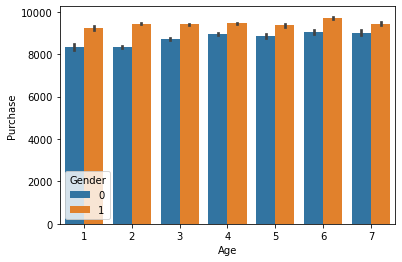

In [49]:
# now we do some visualisation
sns.barplot('Age','Purchase',hue='Gender',data=df)

**purchasing power of men is higher then women**

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

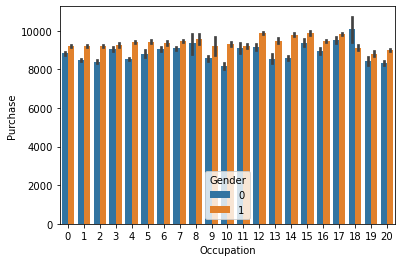

In [50]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

**Occupation wise purchasing, men's position is stronger than women**

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

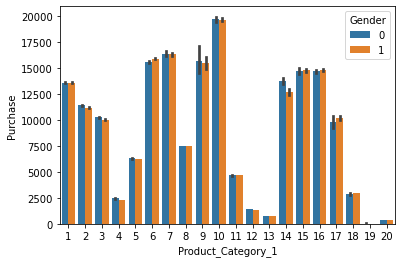

In [53]:
sns.barplot("Product_Category_1","Purchase",hue='Gender',data=df)

**Both men and are equally in spending at product_category**

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

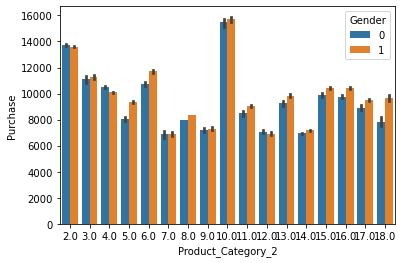

In [55]:
sns.barplot("Product_Category_2","Purchase",hue='Gender',data=df)

**Both men and are equally in spending at product_category**

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

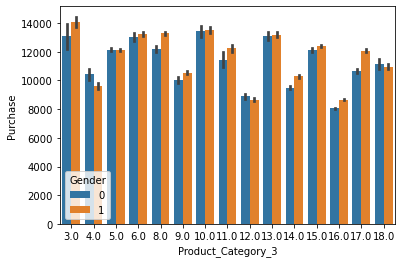

In [56]:
sns.barplot("Product_Category_3","Purchase",hue='Gender',data=df)

**Both men and are equally in spending at product_category**

In [57]:
df_test=df[df['Purchase'].isnull()]

In [62]:
# df_test

In [64]:
# In this all rows come which are not null 
# (~)This is the symbol which is opposite to the condition.
df_train=df[~df['Purchase'].isnull()]


In [65]:
# done with eda 